# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
# Atualmente, este é meu bloco fixo de importações
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests as rq
%matplotlib inline

# & este é meu bloco de importações para uso de Árvores de Decisão/Regressão
from sklearn import tree
from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ["MEDV"])

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [4]:
# Relembrando: "o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita 'missings'.""
X.dropna()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

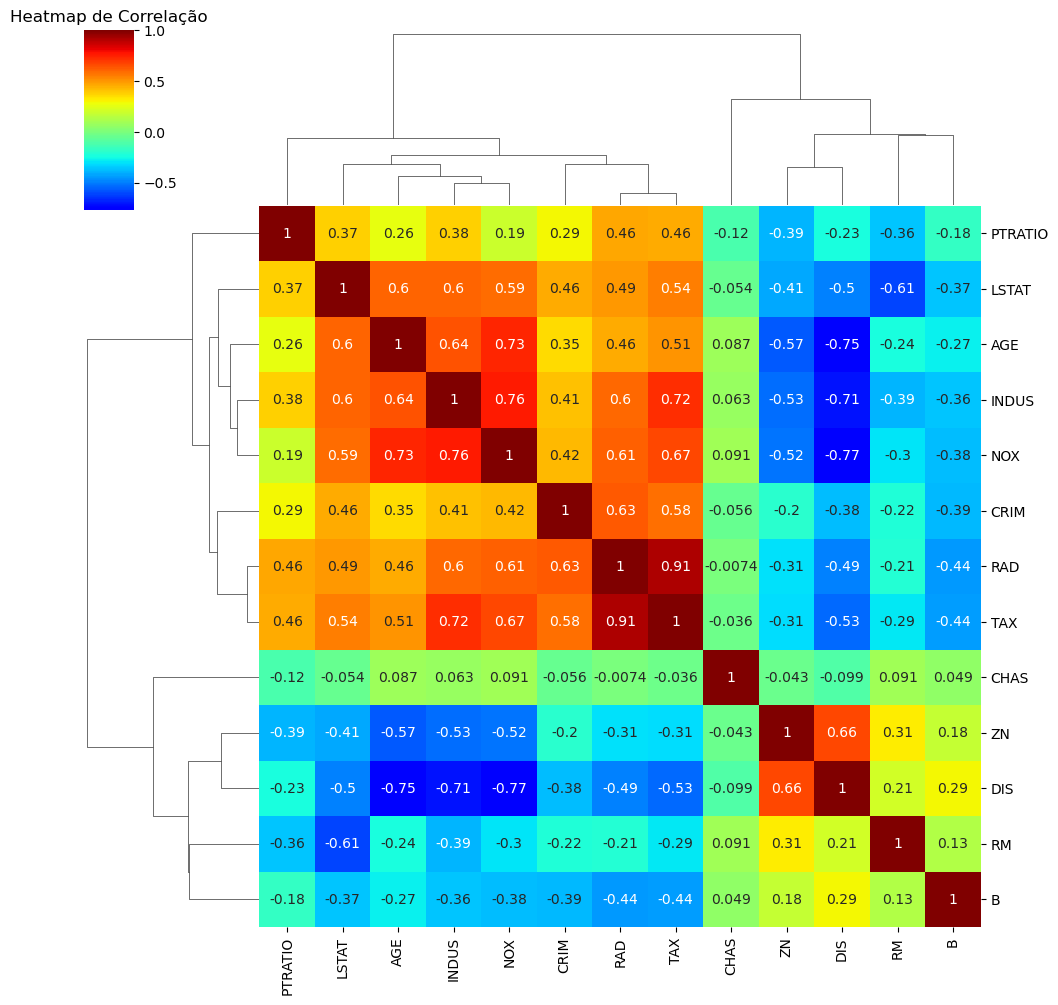

In [5]:
# Gerando a matriz
matriz_correlacao = X.corr()

# Configurando o gráfico
sns.clustermap(matriz_correlacao, annot=True, cmap="jet", figsize=(10, 10), center=0)
plt.title("Heatmap de Correlação")
plt.show()
# A análise para a questão está no markdown seguinte.

O gráfico apresenta algumas possíveis correlações interessantes:
positivas com |>75%|: RAD/TAX e INDUS/NOX
negativas com |>75%|: AGE/DIS e NOX/DIS

Mas o que mais me chamou a atenção foi a neutralidade que a variável CHAS apresenta, tanto que divide a coloração do mapa em quadrantes. Os quadrantes impares possuem "cores frias" com correlações negativas entre as variáveis. Já os quadrantes pares apresentam "cores quentes" com correlações positivas.

Corrigindo, esta variável é interessante pelo seu desinteresse na influência frente as outras; se me permitem o jogo de palavras.

### 3. Separe os dados em validação e teste

In [6]:
# Separando as bases de validação & teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=100)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [7]:
# Definindo os dataframes treino com as respectivas profundidades em seus índices
df_t_d8 = DecisionTreeRegressor(random_state=123, max_depth=8)
df_t_d2 = DecisionTreeRegressor(random_state=123, max_depth=2)

df_t_d8 = df_t_d8.fit(X_treino, y_treino)
df_t_d2 = df_t_d2.fit(X_treino, y_treino)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [8]:
# Calculando os valores
mse_t_8 = df_t_d8.score(X_treino, y_treino)
mse_t_2 = df_t_d2.score(X_treino, y_treino)

# Depois que aprendi a usar o format para printar minhas respostas, prefiro muito usá-lo
resposta = "O MSE da árvore com profundidade {0} é: {1:.2f}"

print(resposta.format(8, mse_t_8).replace(".", ","))
print(resposta.format(2, mse_t_2).replace(".", ","))

O MSE da árvore com profundidade 8 é: 0,98
O MSE da árvore com profundidade 2 é: 0,73


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

De acordo com o MSE, seria a árvore com profundidade 2, pois apresentou um Erro Quadrático Médio menor, ou seja, ajustou melhor os dados.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

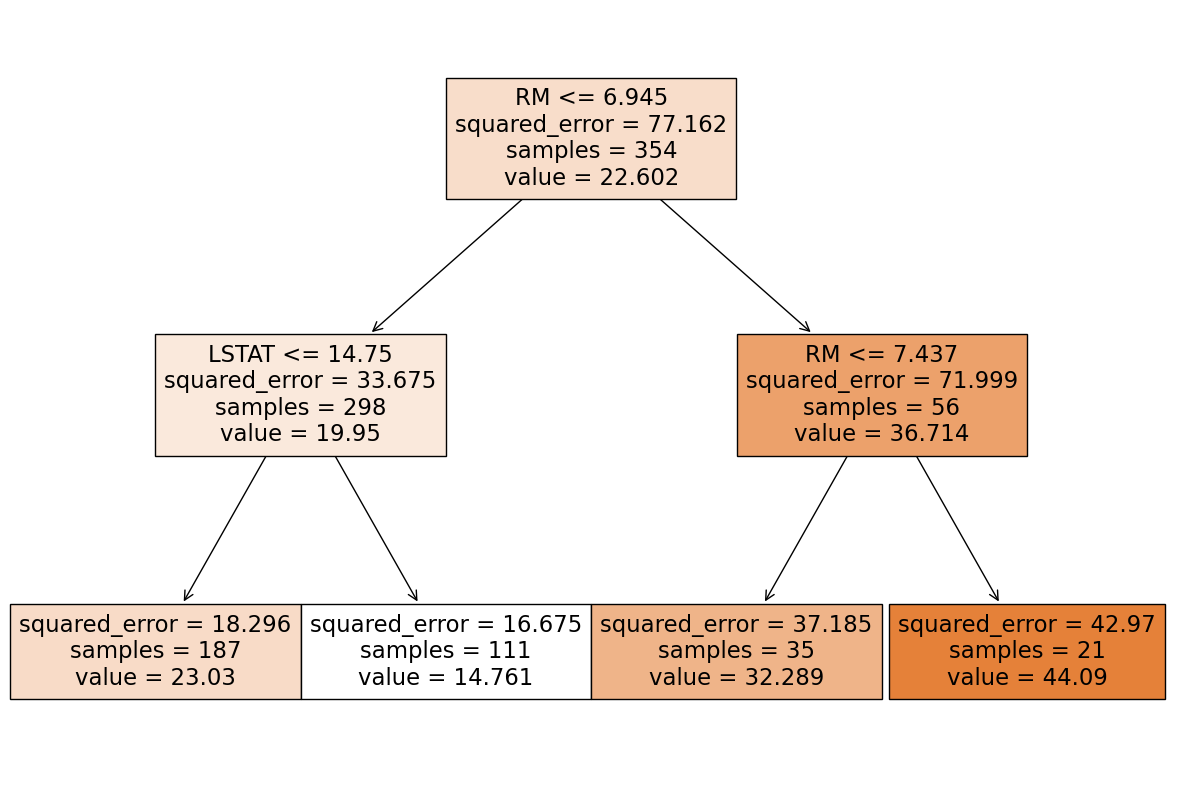

In [9]:
plt.rc("figure", figsize=(15, 10))
tp = tree.plot_tree(df_t_d2, 
                    feature_names=X.columns,  
                    filled=True)
# A análise para a questão está no markdown seguinte.

Comparando os Erros Quadráticos a variável LSAT apresentou melhores resultados considerando que abrangem mais amostras, o que de fato mostra uma quebra mais decisiva perante a base de dados.